In [203]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sci  # Scientific computing library
import plotly.express as px  # Interactive visualization library
import plotly.graph_objs as go  # Graph objects for plotly
from plotly.subplots import make_subplots  # Subplots for plotly

import sklearn
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_predict, RepeatedStratifiedKFold, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, LabelEncoder

import imblearn
from imblearn.over_sampling import SMOTE

import time
# Ensure results are reproducible.
np.random.seed(1)


In [204]:
df = pd.read_csv('Billionaires Statistics Dataset.csv')

# <font color='#34568B'> EDA </font>

In [205]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [206]:
df.shape

(2640, 35)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [208]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


### Data Cleaning

In [209]:
##Droping the columns which is not Useful
df=df.drop(columns={'rank','personName','birthDate','lastName','firstName','source','date','birthYear','birthMonth','birthDay','category','status','city','countryOfCitizenship'},axis=1)

We dropped these columns from the DataFrame because they may not be relevant for the analysis or task at hand. Here's a brief explanation of why each column was dropped:
- personMane, birthDate, lastName, firstName, source: These columns likely contain personal information that may not be necessary for the analysis or may pose privacy concerns.

- date, birthYear, birthMonth, birthDay: If the date column represents the same information as another column (age), it is redundant and can be dropped.

- city, countryOfCitizenship: If the date column represents the same information as another column (country), it is redundant and can be dropped.

- category: If the date column represents the same information as another column (industry), it is redundant and can be dropped.

- status: If the date column represents the same information as another column (selfMade), it is redundant and can be dropped.

By dropping these columns, we reduce the dimensionality of the DataFrame and focus on the columns that are more relevant and informative for the specific analysis or task.

In [210]:
df.shape

(2640, 21)

In [211]:
df.isnull().sum()

finalWorth                                       0
age                                             65
country                                         38
industries                                       0
organization                                  2315
selfMade                                         0
gender                                           0
title                                         2301
state                                         1887
residenceStateRegion                          1893
cpi_country                                    184
cpi_change_country                             184
gdp_country                                    164
gross_tertiary_education_enrollment            182
gross_primary_education_enrollment_country     181
life_expectancy_country                        182
tax_revenue_country_country                    183
total_tax_rate_country                         182
population_country                             164
latitude_country               

In [212]:
def missing(df):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    return pd.concat([missing_values, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
missing(df)

,Missing_Number,Missing_Percent
finalWorth,0,0.000000
age,65,2.462121
country,38,1.439394
industries,0,0.000000
organization,2315,87.689394
selfMade,0,0.000000
gender,0,0.000000
title,2301,87.159091
state,1887,71.477273
residenceStateRegion,1893,71.704545


In [213]:
#Checking the column which is greater than 50% missing
def missing(df):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    high_missing_df = missing_df[missing_df['Missing_Percent'] > 50]
    return high_missing_df
missing(df)

,Missing_Number,Missing_Percent
organization,2315,87.689394
title,2301,87.159091
state,1887,71.477273
residenceStateRegion,1893,71.704545


In [214]:
#Drop the columns which have null vales more than 50%
df=df.drop(columns={'organization','title','residenceStateRegion','state','gross_tertiary_education_enrollment','gross_primary_education_enrollment_country'},axis=1)

In [215]:
#Check the remaing null values by using 1%
def missing(df):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    high_missing_df = missing_df[missing_df['Missing_Percent'] > 1]
    return high_missing_df
missing(df)

,Missing_Number,Missing_Percent
age,65,2.462121
country,38,1.439394
cpi_country,184,6.969697
cpi_change_country,184,6.969697
gdp_country,164,6.212121
life_expectancy_country,182,6.893939
tax_revenue_country_country,183,6.931818
total_tax_rate_country,182,6.893939
population_country,164,6.212121
latitude_country,164,6.212121


In [216]:
#Removing the special characters
df['gdp_country'] = df['gdp_country'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)
df['gdp_country'] = df['gdp_country'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)
df['gdp_country'] = df['gdp_country'].astype('float')

In [217]:
def replace_missing(df, column, value):
    df[column].fillna(value, inplace=True)
    return df

df = replace_missing(df, 'country', 'other')

In [218]:
#Fill the null values with mean values¶
columns_to_fill = ['age', 'gdp_country','life_expectancy_country','tax_revenue_country_country','total_tax_rate_country','cpi_country','cpi_change_country','population_country','latitude_country','longitude_country']
for col in columns_to_fill:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

In [219]:
def missing(df):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    return pd.concat([missing_values, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
missing(df)

,Missing_Number,Missing_Percent
finalWorth,0,0.0
age,0,0.0
country,0,0.0
industries,0,0.0
selfMade,0,0.0
gender,0,0.0
cpi_country,0,0.0
cpi_change_country,0,0.0
gdp_country,0,0.0
life_expectancy_country,0,0.0


In [220]:
categorical_feature=df.select_dtypes(include=['object','bool']).columns
categorical_feature

Index(['country', 'industries', 'selfMade', 'gender'], dtype='object')

In [221]:
numerical_feature=df.select_dtypes(include=['int64','float64']).columns
numerical_feature

Index(['finalWorth', 'age', 'cpi_country', 'cpi_change_country', 'gdp_country',
       'life_expectancy_country', 'tax_revenue_country_country',
       'total_tax_rate_country', 'population_country', 'latitude_country',
       'longitude_country'],
      dtype='object')

### Visualization and Insights

In [222]:
# Group the data by country and count the number of billionaires
country_counts = df['country'].value_counts()

# Get the corresponding persons for the top 10 countries
top_10_persons = df[df['country'].isin(country_counts.index)]
top_10_persons = top_10_persons[['country', 'gender']].drop_duplicates()
plt.figure(figsize=(12, 6))
gender_counts = top_10_persons['gender'].value_counts()

fig = px.bar(x=gender_counts.index, y=gender_counts.values, color=gender_counts.index,
             labels={'x': 'Gender', 'y': 'Count'}, color_discrete_map={'M': 'lightblue', 'F': 'pink'})

fig.update_layout(title='Gender Distribution among Billionaires', legend_title_text='Gender')
fig.show()


<Figure size 1200x600 with 0 Axes>

In [223]:
#{True: 'Self Made Billionaires', False: 'Inherited Wealth'}
self_made_counts = df['selfMade'].value_counts()

colors = ['lightblue', 'pink']
plt.figure(figsize=(12, 6))
# Create a pie chart
fig = px.pie(names=self_made_counts.index, values=self_made_counts.values, title='Self-made Billionaires Distribution',
             labels={'index': 'Self-made', 'values': 'Count'}, hole=0.3, color_discrete_sequence=colors)

fig.show()


<Figure size 1200x600 with 0 Axes>

- 31.4% of Billionaires are Self-Made

- 68.6% of Billionaires have Inherited Wealth

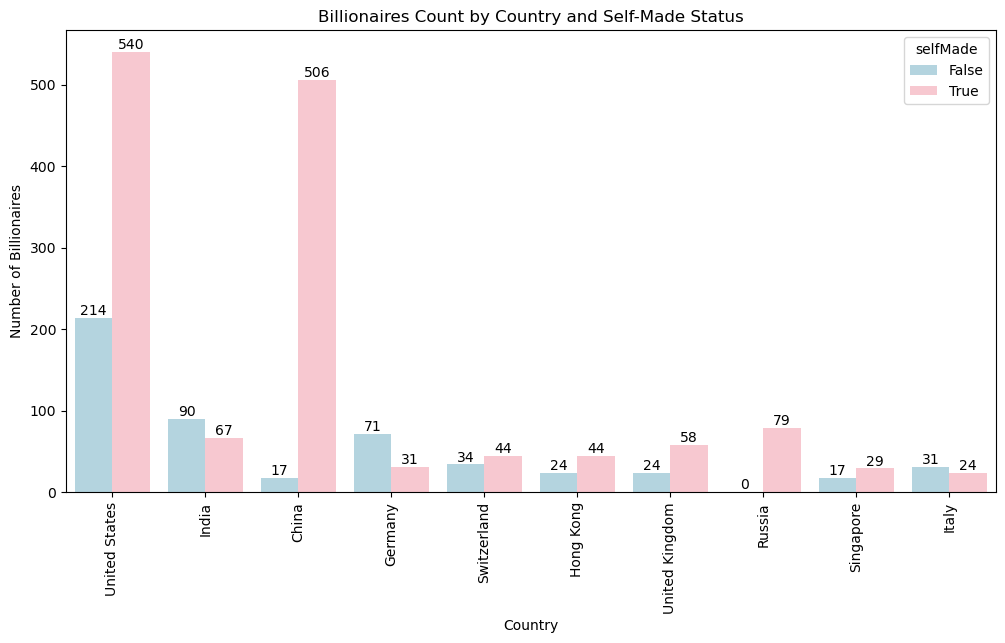

In [224]:
top_10_countries = df['country'].value_counts().head(10).index

b_top_10 = df[df['country'].isin(top_10_countries)]


colors = ['lightblue', 'pink']
plt.figure(figsize=(12, 6))

c_plot = sns.countplot(x='country', hue='selfMade', data=b_top_10, palette=colors)


plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Billionaires Count by Country and Self-Made Status')
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)


for i in c_plot.containers:
    c_plot.bar_label(i)

plt.show()


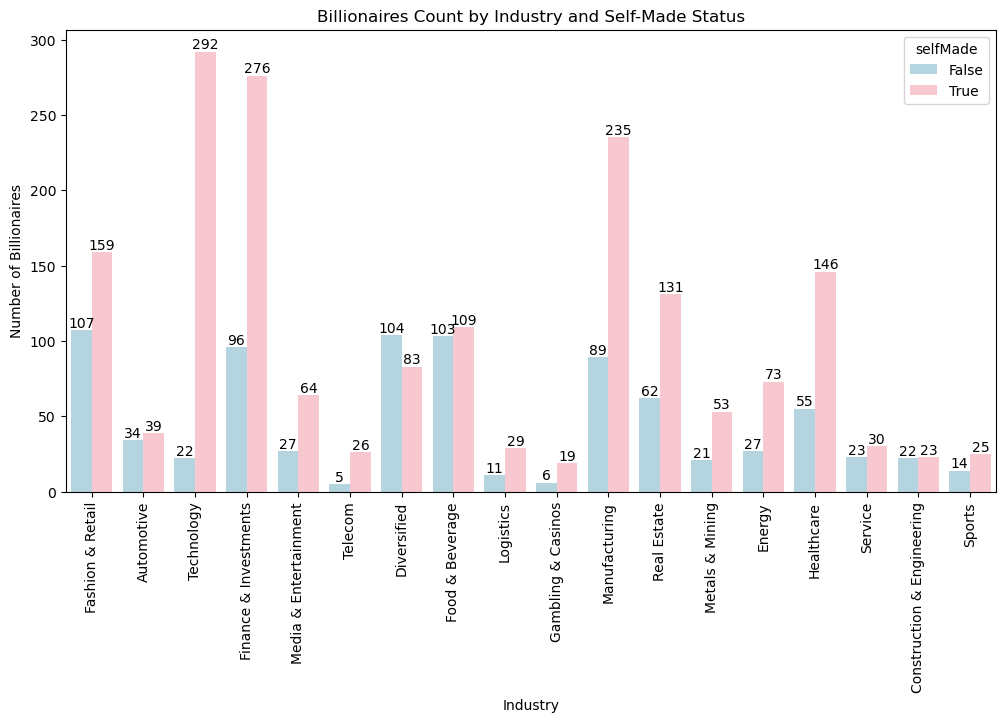

In [225]:


industry = df['industries'].value_counts().index

c_top_10 = df[df['industries'].isin(industry)]

colors = ['lightblue', 'pink']


plt.figure(figsize=(12, 6))

c_plot = sns.countplot(x='industries', hue='selfMade', data=c_top_10, palette=colors)

plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.title('Billionaires Count by Industry and Self-Made Status')
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)

for i in c_plot.containers:
    c_plot.bar_label(i)

plt.show()


 **The Technology and Finance & Investments sectors generate the highest number of self-made billionaires.**

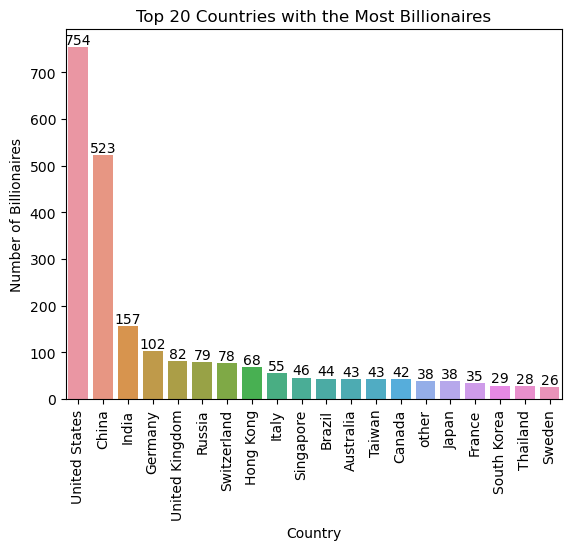

<Figure size 1200x600 with 0 Axes>

In [226]:
d = df['country'].value_counts()[0:20]
c_plot = sns.barplot(x=d.index, y=d.values)


plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Top 20 Countries with the Most Billionaires')
plt.figure(figsize=(12, 6))
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)


for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

### **The countries with the highest number of billionaires are the United States, China, and India.**

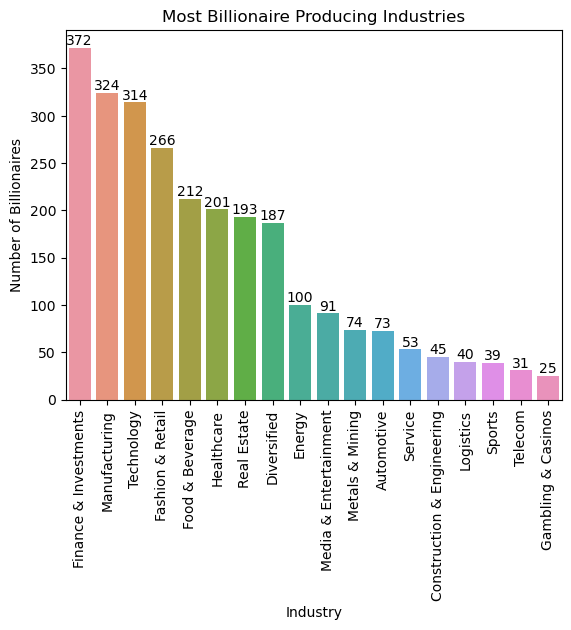

<Figure size 1200x600 with 0 Axes>

In [227]:
d = df['industries'].value_counts()
c_plot = sns.barplot(x=d.index, y=d.values)

plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.title('Most Billionaire Producing Industries')
plt.figure(figsize=(12, 6))
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)

for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()


### **The sectors of Finance & Investments, Manufacturing, and Technology are the primary contributors to the highest number of billionaires.**

In [228]:

x_data = df.groupby('industries')['finalWorth'].sum().reset_index()


fig = go.Figure(go.Sunburst(
    labels=x_data['industries'],
    parents=[''] * len(x_data['industries']),
    values=x_data['finalWorth'],
    textinfo='label+percent entry',
))


fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    title='Sunburst Chart for Industry Contribution in Wealth',
    width=700,  
    height=500,
)

fig.show()


- **The Technology industry's billionaires possess the largest share of wealth, accounting for 15% of the total.**
- **Billionaires in the Fashion & Retail industry hold 14% of the total wealth, while those in the Construction & Engineering have the smallest share, with less than 1%.**

<Axes: xlabel='age', ylabel='Count'>

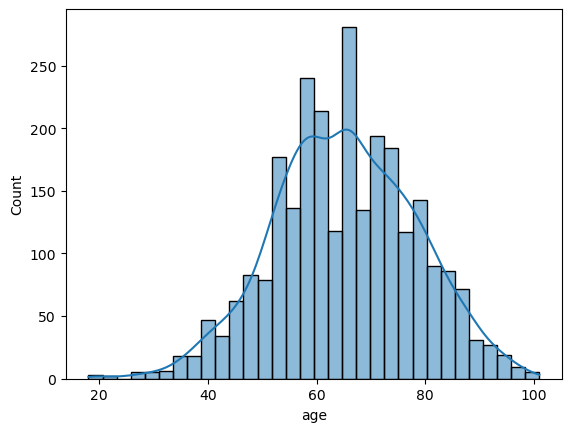

In [229]:
sns.histplot(data=df, x='age', kde=True)

**60% of Billionaires fall in the Age Range 50-70**

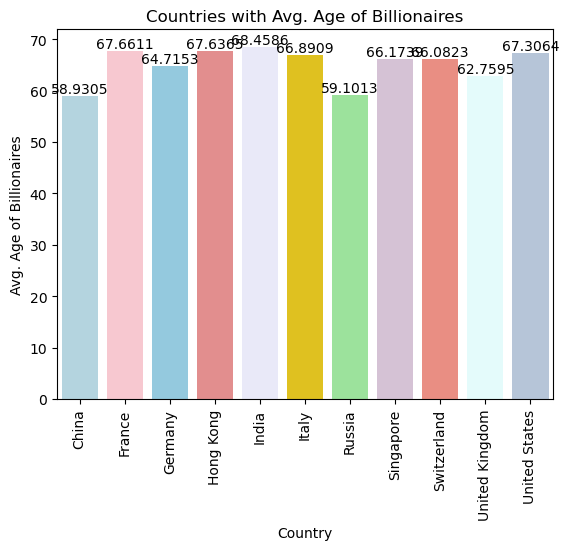

<Figure size 1200x600 with 0 Axes>

In [230]:
d = df[['country', 'age']]

avg_age = d.groupby('country')['age'].mean().reset_index()
avg_age.columns = ['country', 'avg age of billionaires']

countries = ['United States', 'India', 'China', 'France', 'United Kingdom',
             'Russia', 'Hong Kong', 'Italy', 'Switzerland', 'Singapore', 'Germany']
top_countries_age = avg_age.loc[avg_age['country'].isin(countries)]


colors = ['lightblue', 'pink', 'skyblue', 'lightcoral', 'lavender', 'gold', 'lightgreen', 'thistle', 'salmon', 'lightcyan', 'lightsteelblue']


c_plot = sns.barplot(x=top_countries_age['country'],
                     y=top_countries_age['avg age of billionaires'], palette=colors)

plt.xlabel('Country')
plt.ylabel('Avg. Age of Billionaires')
plt.title('Countries with Avg. Age of Billionaires')
plt.figure(figsize=(12, 6))
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)


for i in c_plot.containers:
    c_plot.bar_label(i)

plt.show()


- **Average age of Billionaires in the US is 67.3 years**

- **Average age of Billionaires in China is 58.6 years**

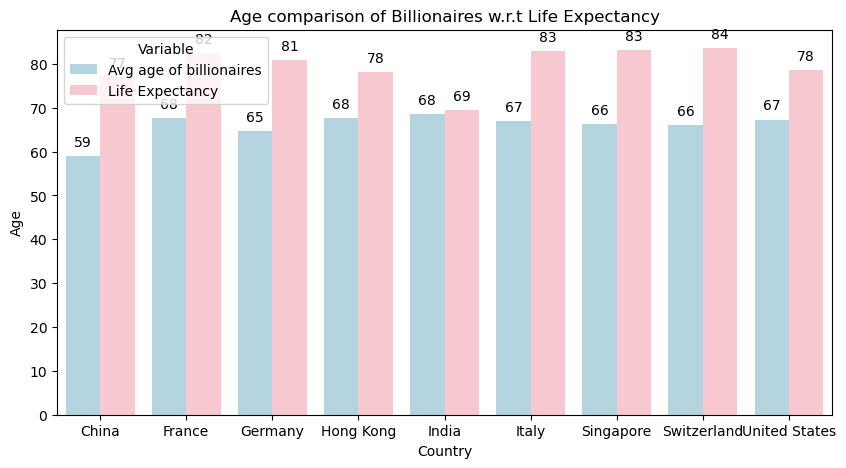

In [231]:
#Average Age comparison of top10 Countries Billionaires to Life Expectancy
d= df[['country','age', 'life_expectancy_country']]
avg_age = d.groupby('country')[['age','life_expectancy_country']].mean().reset_index()
avg_age.columns = ['Country', 'Avg age of billionaires', 'Life Expectancy']
countries = ['United States', 'India','China', 'France','United Kingdom'
            'Russia','Hong Kong', 'Italy','Switzerland','Singapore','Germany']
top_countries_age = avg_age.loc[avg_age['Country'].isin(countries)]
top_countries_age.fillna(85.39)



df_long = pd.melt(top_countries_age, id_vars='Country', var_name='Variable', value_name='Value')

plt.figure(figsize=(10,5))
colors = ['lightblue', 'pink']
c_plot = sns.barplot(x='Country', y='Value', hue='Variable', data=df_long, palette=colors)


plt.title('Age comparison of Billionaires w.r.t Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Variable')

"""for i in c_plot.containers:
    c_plot.bar_label(i,)"""

for p in c_plot.patches:
    c_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<Axes: xlabel='finalWorth', ylabel='Count'>

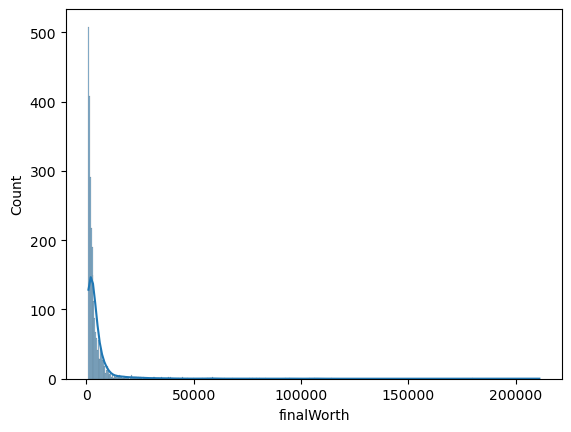

In [232]:
sns.histplot(data=df, x='finalWorth', kde=True)

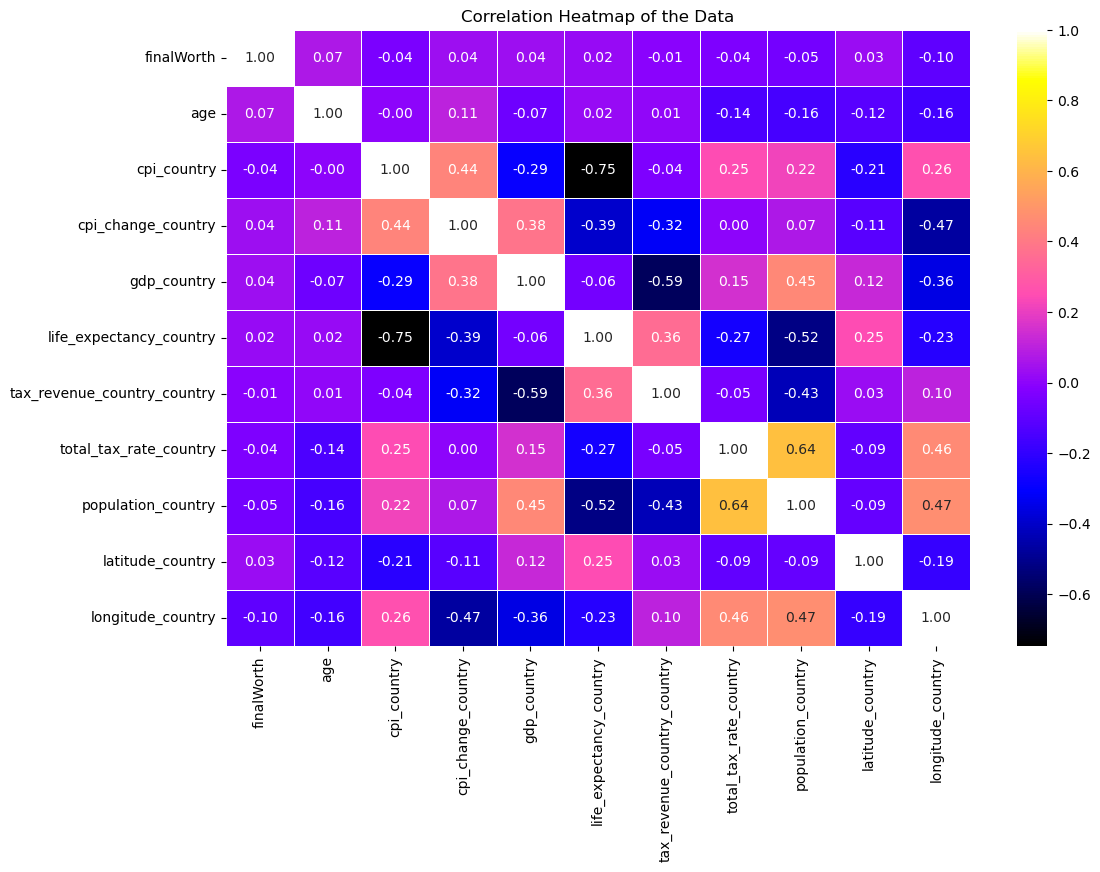

In [233]:
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='gnuplot2', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap of the Data')
plt.show()


In [234]:
fig = go.Figure(data=go.Scattergeo(
    lon=df["longitude_country"],
    lat=df["latitude_country"],
    text=df["country"],
    mode="markers",
    marker=dict(
        size=8,
        opacity=0.6,
        color=df["finalWorth"],
        colorscale="Rainbow",
        colorbar=dict(title="Final Worth")
    )
))

fig.update_geos(projection_type="natural earth")
fig.update_layout(title="Billionaires' Distribution on World Map")

fig.show()

# <font color='#34568B'> Machine Learning </font>

### Preprocessing

In [235]:
df=df.drop(columns={'latitude_country', 'longitude_country'}) #redundant

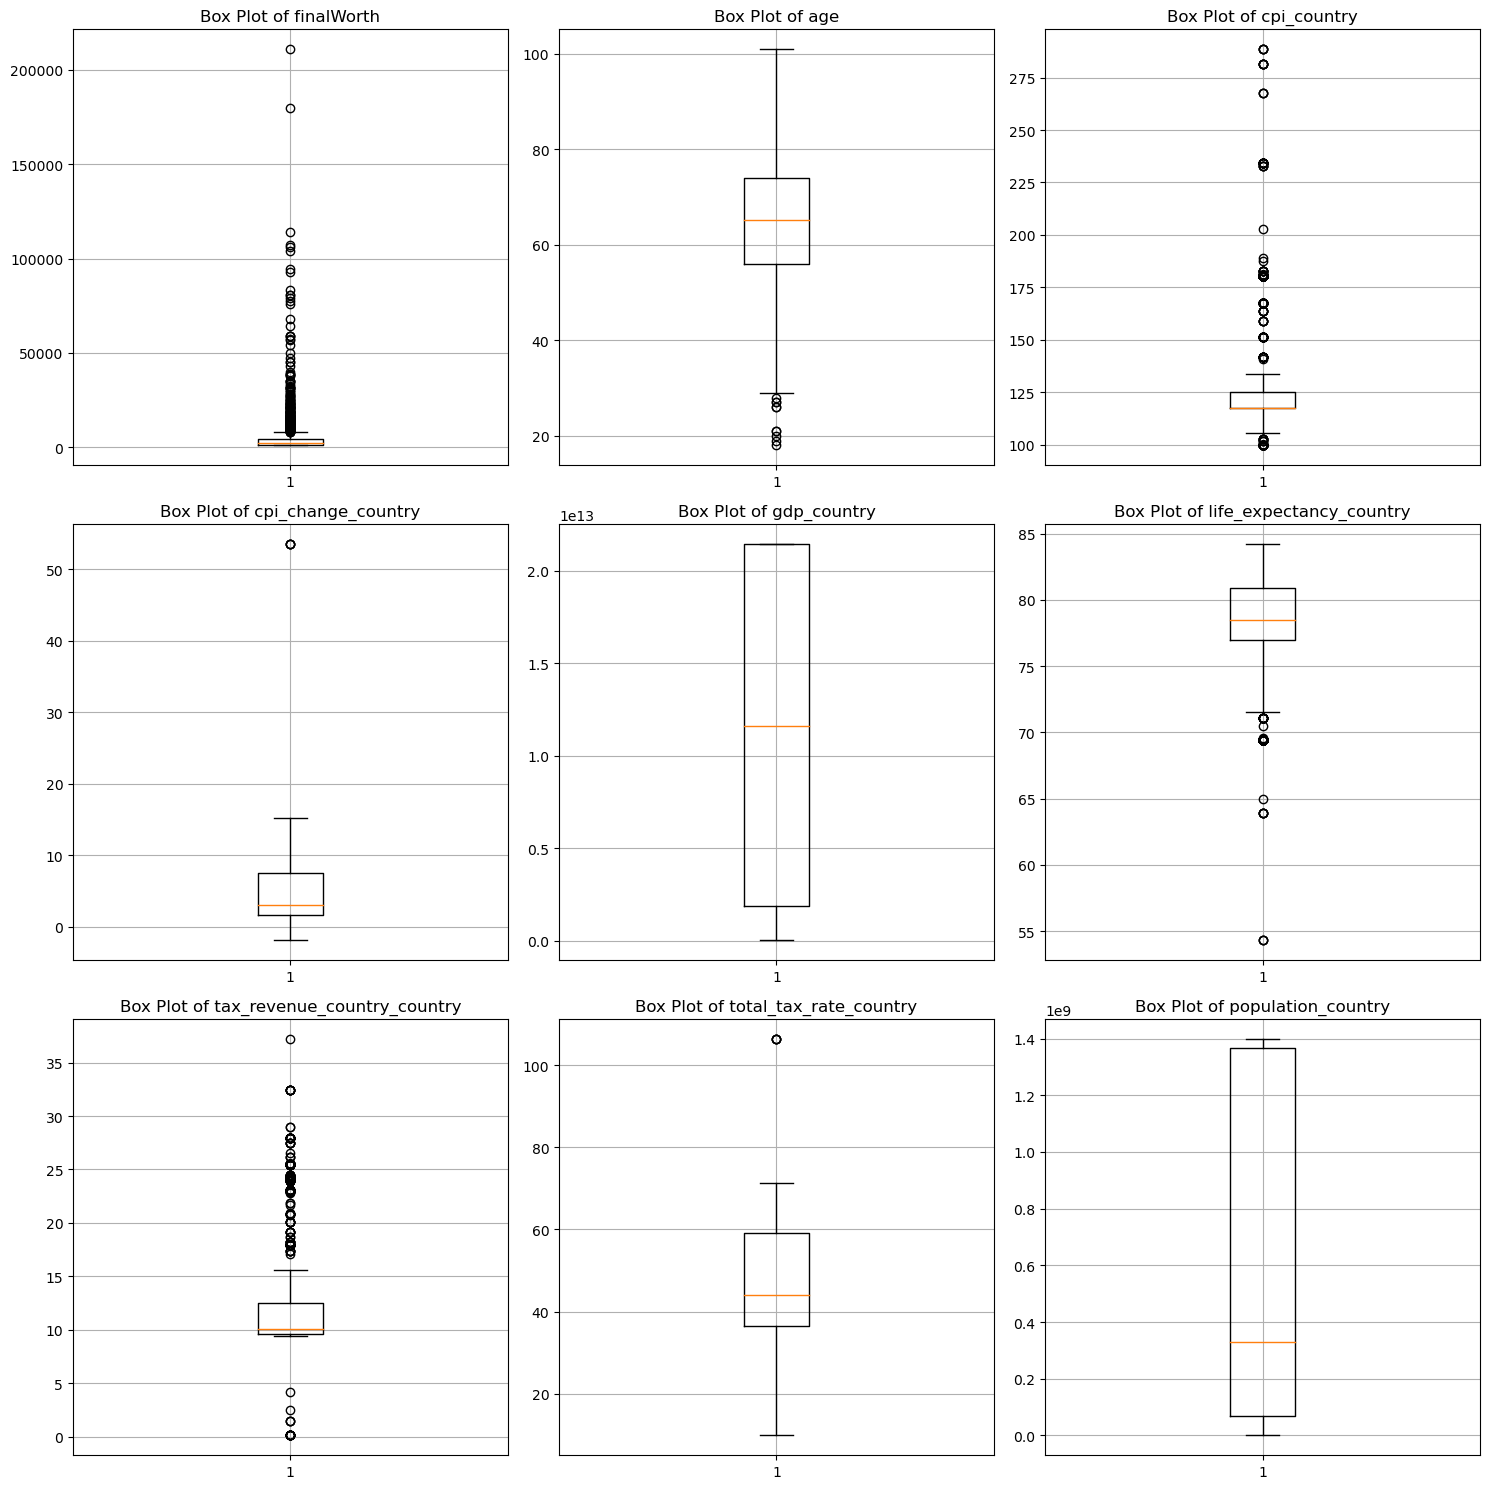

In [236]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
for i, column in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    ax = axes[i // 3, i % 3] 
    ax.boxplot(df[column])
    ax.set_title(f'Box Plot of {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [237]:
numerical_feature=df.select_dtypes(include=['int64','float64']).columns
categorical_feature=df.select_dtypes(include=['object','bool']).columns

In [238]:
quantile = QuantileTransformer(output_distribution='uniform')
X = quantile.fit_transform(df[numerical_feature])
quantile.transform(X)
df[numerical_feature] = pd.DataFrame(X)

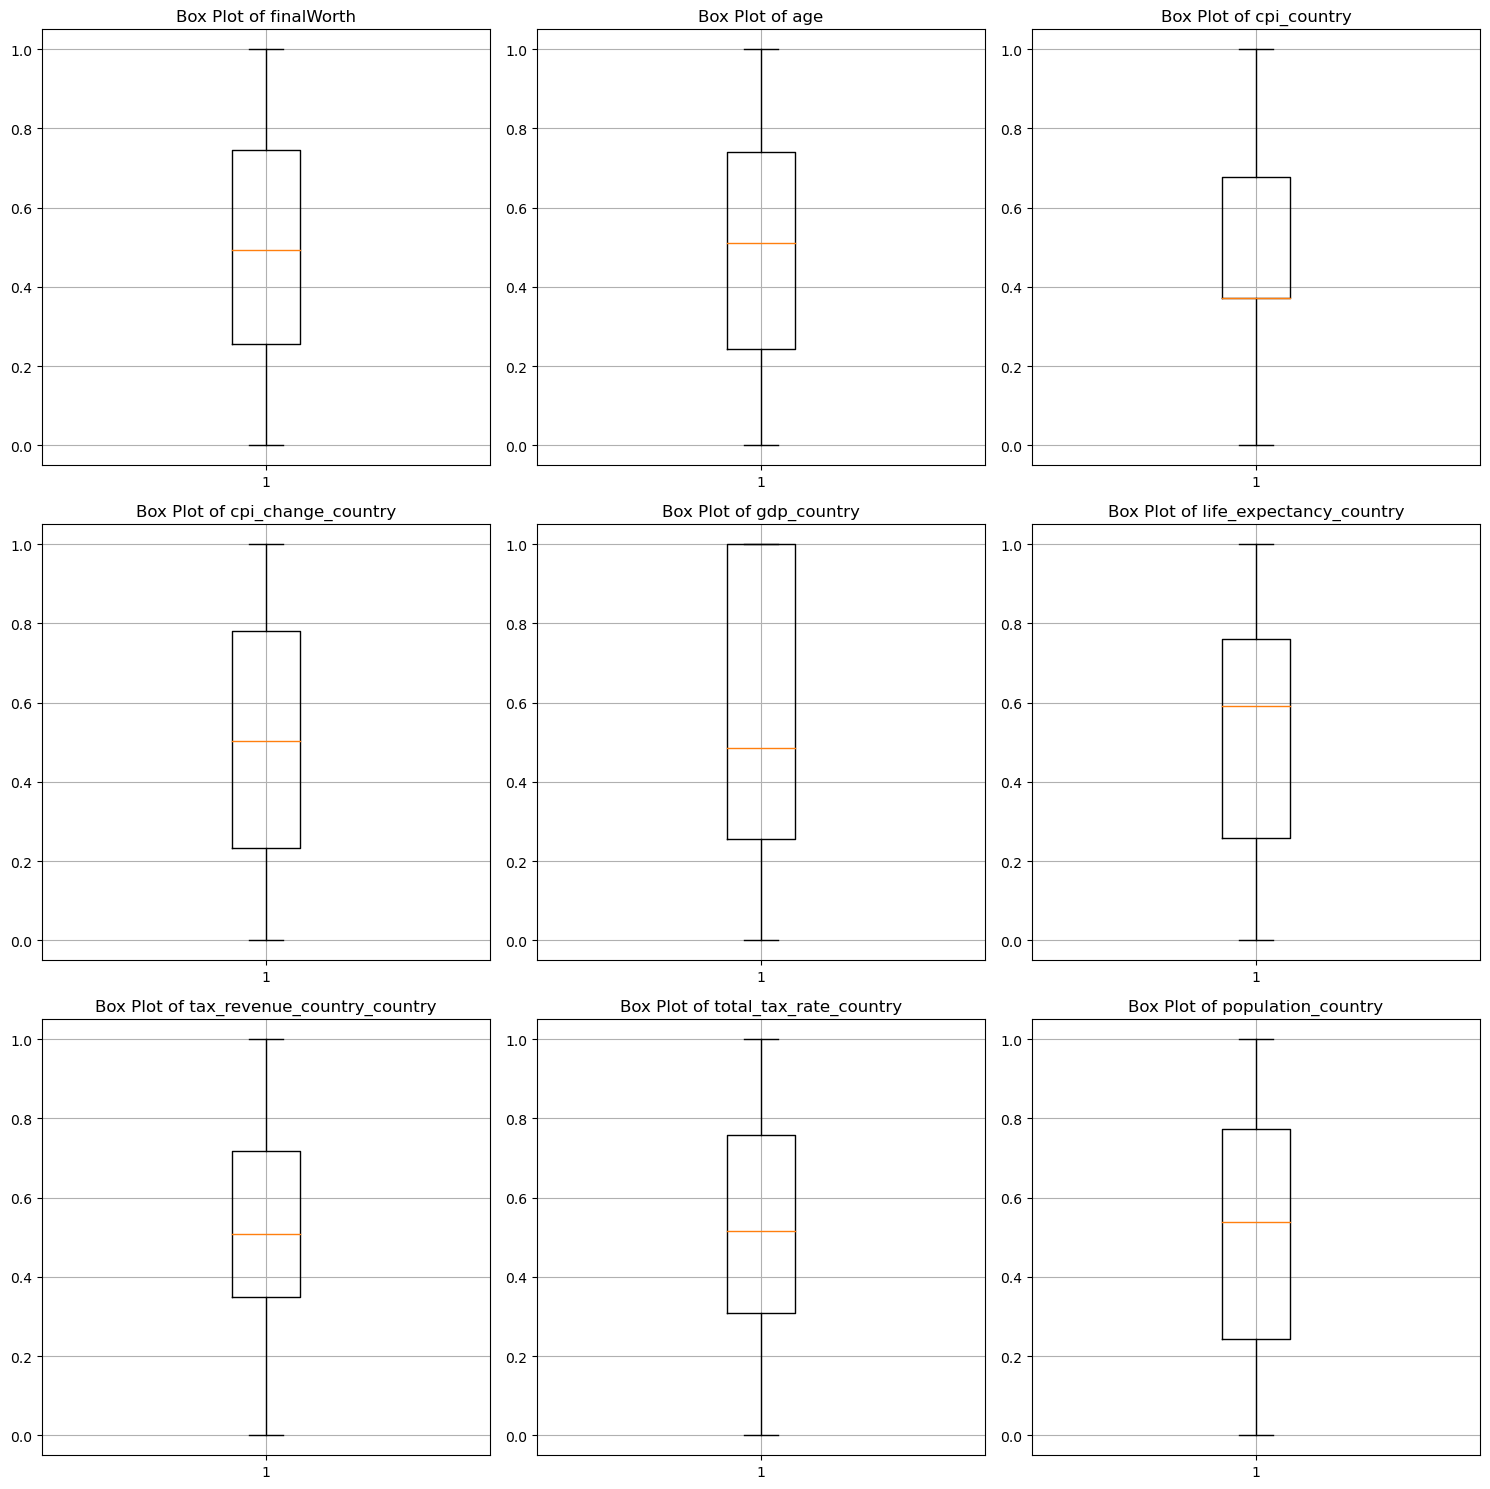

In [239]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
for i, column in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    ax = axes[i // 3, i % 3] 
    ax.boxplot(df[column])
    ax.set_title(f'Box Plot of {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [240]:
le = LabelEncoder()
for col in categorical_feature:
    df[col] = le.fit_transform(df[col])

scaler = MinMaxScaler()
df[numerical_feature] = scaler.fit_transform(df[numerical_feature])

df

,finalWorth,age,country,industries,selfMade,gender,cpi_country,cpi_change_country,gdp_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
0,1.000000,0.741241,24,4,0,1,0.063063,0.151151,0.363363,0.855856,0.918919,0.974975,0.243243
1,0.999694,0.129630,74,0,1,1,0.372372,0.781782,1.000000,0.590591,0.349349,0.307808,0.537538
2,0.999043,0.330831,74,16,1,1,0.372372,0.781782,1.000000,0.590591,0.349349,0.307808,0.537538
3,0.998693,0.827327,74,16,1,1,0.372372,0.781782,1.000000,0.590591,0.349349,0.307808,0.537538
4,0.998571,0.982983,74,5,1,1,0.372372,0.781782,1.000000,0.590591,0.349349,0.307808,0.537538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,0.000000,0.129630,16,8,1,1,0.676176,0.399900,0.615115,0.259760,0.107107,0.868869,1.000000
2636,0.000000,0.863363,74,6,0,1,0.372372,0.781782,1.000000,0.590591,0.349349,0.307808,0.537538
2637,0.000000,0.363363,16,10,1,1,0.676176,0.399900,0.615115,0.259760,0.107107,0.868869,1.000000
2638,0.000000,0.666667,16,13,1,1,0.676176,0.399900,0.615115,0.259760,0.107107,0.868869,1.000000


### Splitting 

In [241]:
y = df['selfMade']
X = df.drop(['selfMade'], axis=1)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1980, 12), (660, 12), (1980,), (660,))

In [243]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)
print(X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape)

smote_cv = SMOTE(sampling_strategy='minority')

X_SMOTE_cv, y_SMOTE_cv = smote_cv.fit_resample(X_train_cv, y_train_cv)
X_SMOTE_cv = pd.DataFrame(data = X_SMOTE_cv, columns = X_SMOTE_cv.columns)

(1782, 12) (198, 12) (1782,) (198,)


### Cross Validation

In [244]:
cross_validation_t_time = []
cross_validation_scores = []

cv_models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
}

for model in cv_models:
    
    start = time.time()
    scores = cross_val_score(cv_models[model], X_SMOTE_cv, y_SMOTE_cv, cv = 10)
    end = time.time()
    
    print(f'{model} List of scores :\n{scores}')
    
    cross_validation_t_time.append(end - start)
    
    avg_scores = np.mean(scores)
    
    print(f'{model} Average Score : {avg_scores}\n')
    
    cross_validation_scores.append(avg_scores)

Logistic Regression List of scores :
[0.7        0.696      0.68       0.68       0.76305221 0.6746988
 0.72289157 0.68674699 0.68674699 0.69477912]
Logistic Regression Average Score : 0.6984915662650601

KNN List of scores :
[0.74       0.792      0.752      0.748      0.82329317 0.79919679
 0.81526104 0.80722892 0.82730924 0.82329317]
KNN Average Score : 0.792758232931727

SVM List of scores :
[0.612      0.616      0.64       0.648      0.69076305 0.64257028
 0.63052209 0.62650602 0.67068273 0.59036145]
SVM Average Score : 0.6367405622489961

Decision Tree List of scores :
[0.712      0.752      0.732      0.776      0.82329317 0.80722892
 0.82329317 0.86746988 0.84337349 0.82329317]
Decision Tree Average Score : 0.7959951807228915

Random Forest List of scores :
[0.78       0.8        0.732      0.736      0.86345382 0.86345382
 0.86345382 0.86345382 0.88353414 0.83935743]
Random Forest Average Score : 0.8224706827309237



In [245]:
print('Accuracies using Average Cross Validation :-\n')
for i, model in enumerate(cv_models):
    print(model, cross_validation_scores[i])

Accuracies using Average Cross Validation :-

Logistic Regression 0.6984915662650601
KNN 0.792758232931727
SVM 0.6367405622489961
Decision Tree 0.7959951807228915
Random Forest 0.8224706827309237


In [247]:
cv_rf = RandomForestClassifier()

cv_rf.fit(X_SMOTE_cv, y_SMOTE_cv)

y_pred = cv_rf.predict(X_test)

print('Accuracy for the best model using the fainal testing set :')
print(accuracy_score(y_test, y_pred).round(2))

Accuracy for the best model using the fainal testing set :-
0.76


### GridSearch

In [248]:
# plotting Confusion Matrix

def plot_conf_mtrix(name, y_pred, y_test):
    print()
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = plt.cm.Blues)
    ax.set_title(f'{name} Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

def cls_report(name, y_pred, y_test):
    print(f'{name} Classification Report :\n')
    print('-'*54)
    print()
    print(classification_report(y_test, y_pred))
    print('-'*54)
    print()
    print('Accuracy Score  : ' + str(round(accuracy_score(y_test, y_pred),3)))
    print('Precision Score : ' + str(round(precision_score(y_test, y_pred),3)))
    print('Recall Score    : ' + str(round(recall_score(y_test, y_pred),3)))
    print('F-Score         : ' + str(round(f1_score(y_test, y_pred),3)))

The model was trained successfuly.

The predicted values       : Counter({1: 418, 0: 242}).
The real values            : Counter({1: 447, 0: 213}).
The accuracy for the model : 0.75
Number of mislabeled points out of a total 660 points: 165



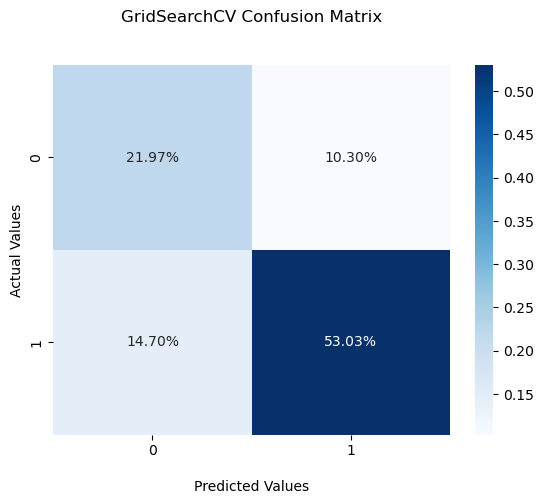

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       213
           1       0.84      0.78      0.81       447

    accuracy                           0.75       660
   macro avg       0.72      0.73      0.72       660
weighted avg       0.76      0.75      0.75       660

------------------------------------------------------

Accuracy Score  : 0.75
Precision Score : 0.837
Recall Score    : 0.783
F-Score         : 0.809


In [249]:

from collections import Counter


smote_cv = SMOTE(sampling_strategy='minority')

X_SMOTE, y_SMOTE = smote_cv.fit_resample(X_train, y_train)
X_SMOTE = pd.DataFrame(data = X_SMOTE, columns = X_SMOTE.columns)

rf_hyp = RandomForestClassifier()

n_estimators = [100, 200, 500]
criterion = ["gini", "entropy"]
max_depth = [2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt', 'log2']

rf_hyperparameters = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    max_features=max_features
)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=rf_hyp,
    param_grid=rf_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_rf = grid_search.fit(X_SMOTE, y_SMOTE)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
rf_y_pred_hyp = best_rf.predict(X_test)
end = time.time()

p_time = end - start

t_score = best_rf.score(X_SMOTE, y_SMOTE)

print(f'The predicted values       : {Counter(rf_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test)}.')

accu = accuracy_score(y_test, rf_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test != rf_y_pred_hyp).sum()))

plot_conf_mtrix(best_rf.__class__.__name__, rf_y_pred_hyp, y_test)
cls_report(best_rf.__class__.__name__, rf_y_pred_hyp, y_test)